In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver

import urllib.request
import pandas as pd

from os import getcwd, listdir
from os.path import join, split

from vcblry_creds import vcblry_usr, vcblry_pwd

from IPython.display import Image

In [2]:
from sys import version
version

'3.7.3 (default, Mar 27 2019, 22:11:17) \n[GCC 7.3.0]'

In [3]:
getcwd()

'/mnt/x/Dropbox/_SSD_X/git_connect/02_vocabuilary.com'

In [4]:
login_page  = "https://www.vocabulary.com/login/"
target_url  = "https://www.vocabulary.com/account/progress/words/mastered"

&nbsp;

### 1. Initlialize ChromeDriver

This should open a new Chrome browser window

In [5]:
driver = webdriver.Chrome(join(getcwd(), "chromedriver_win32", "chromedriver.exe"))

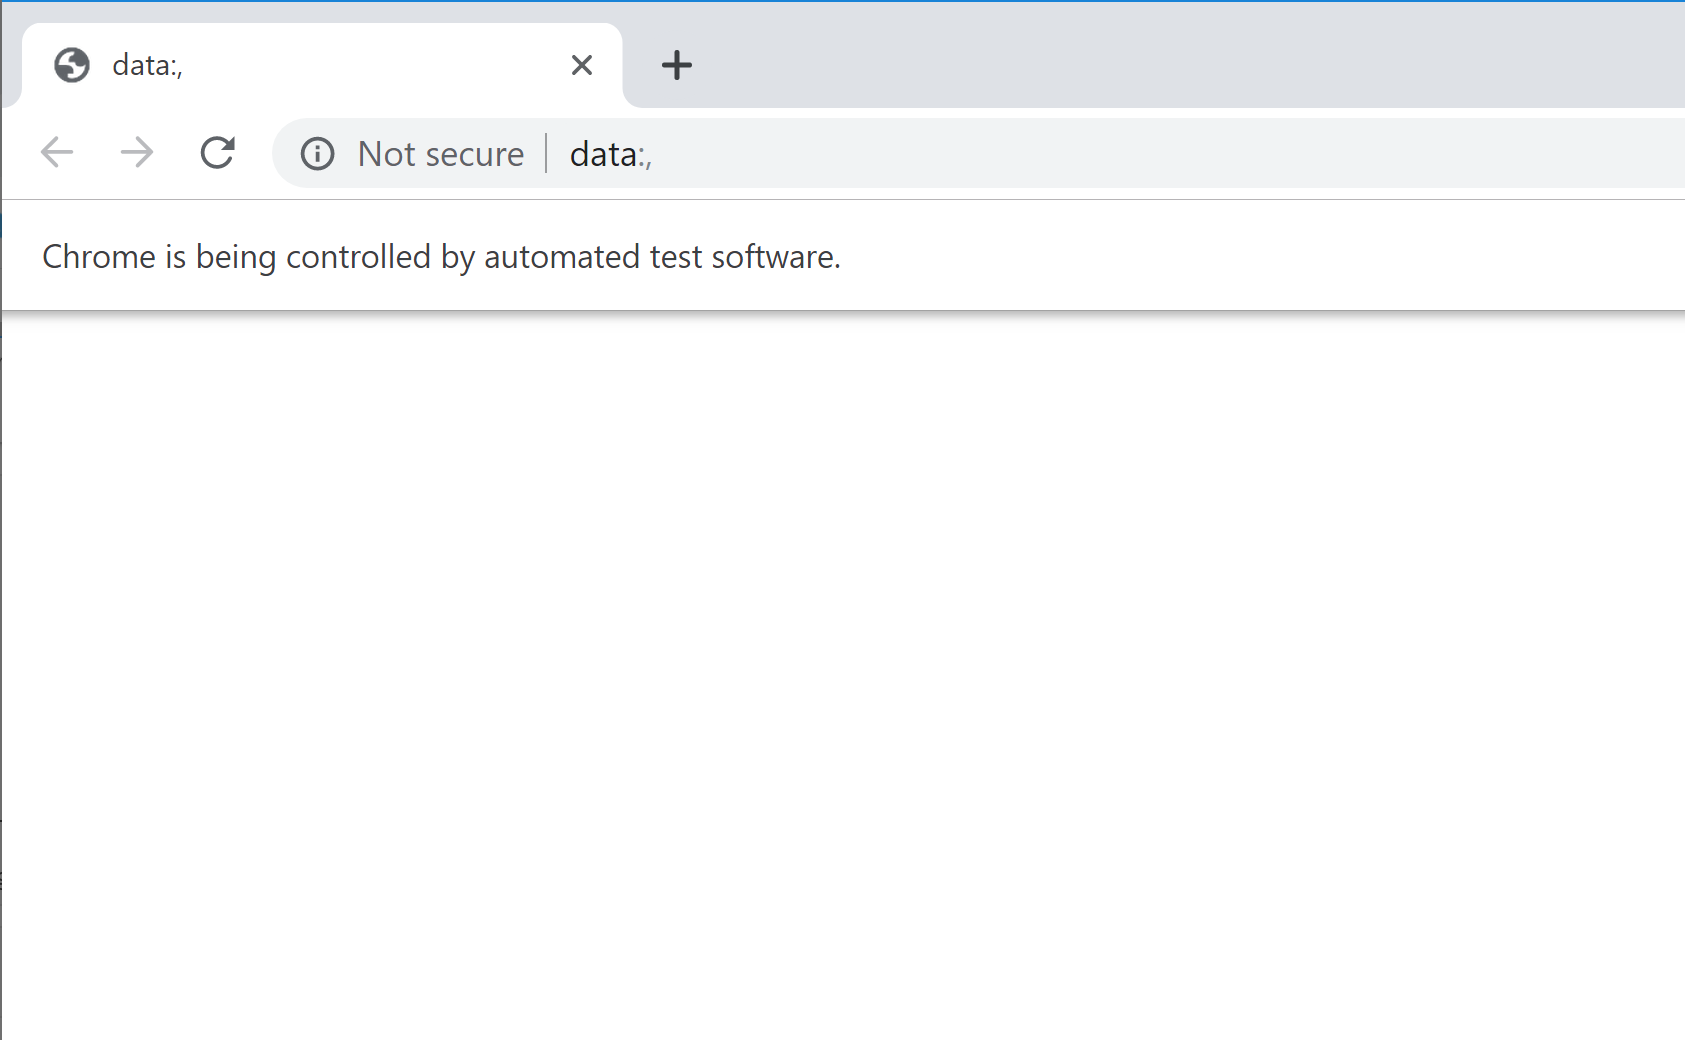

In [10]:
Image(filename="docs/_static/open_driver.PNG", width = 1000)

&nbsp;

&nbsp;

&nbsp;

In [6]:
driver.get(login_page)

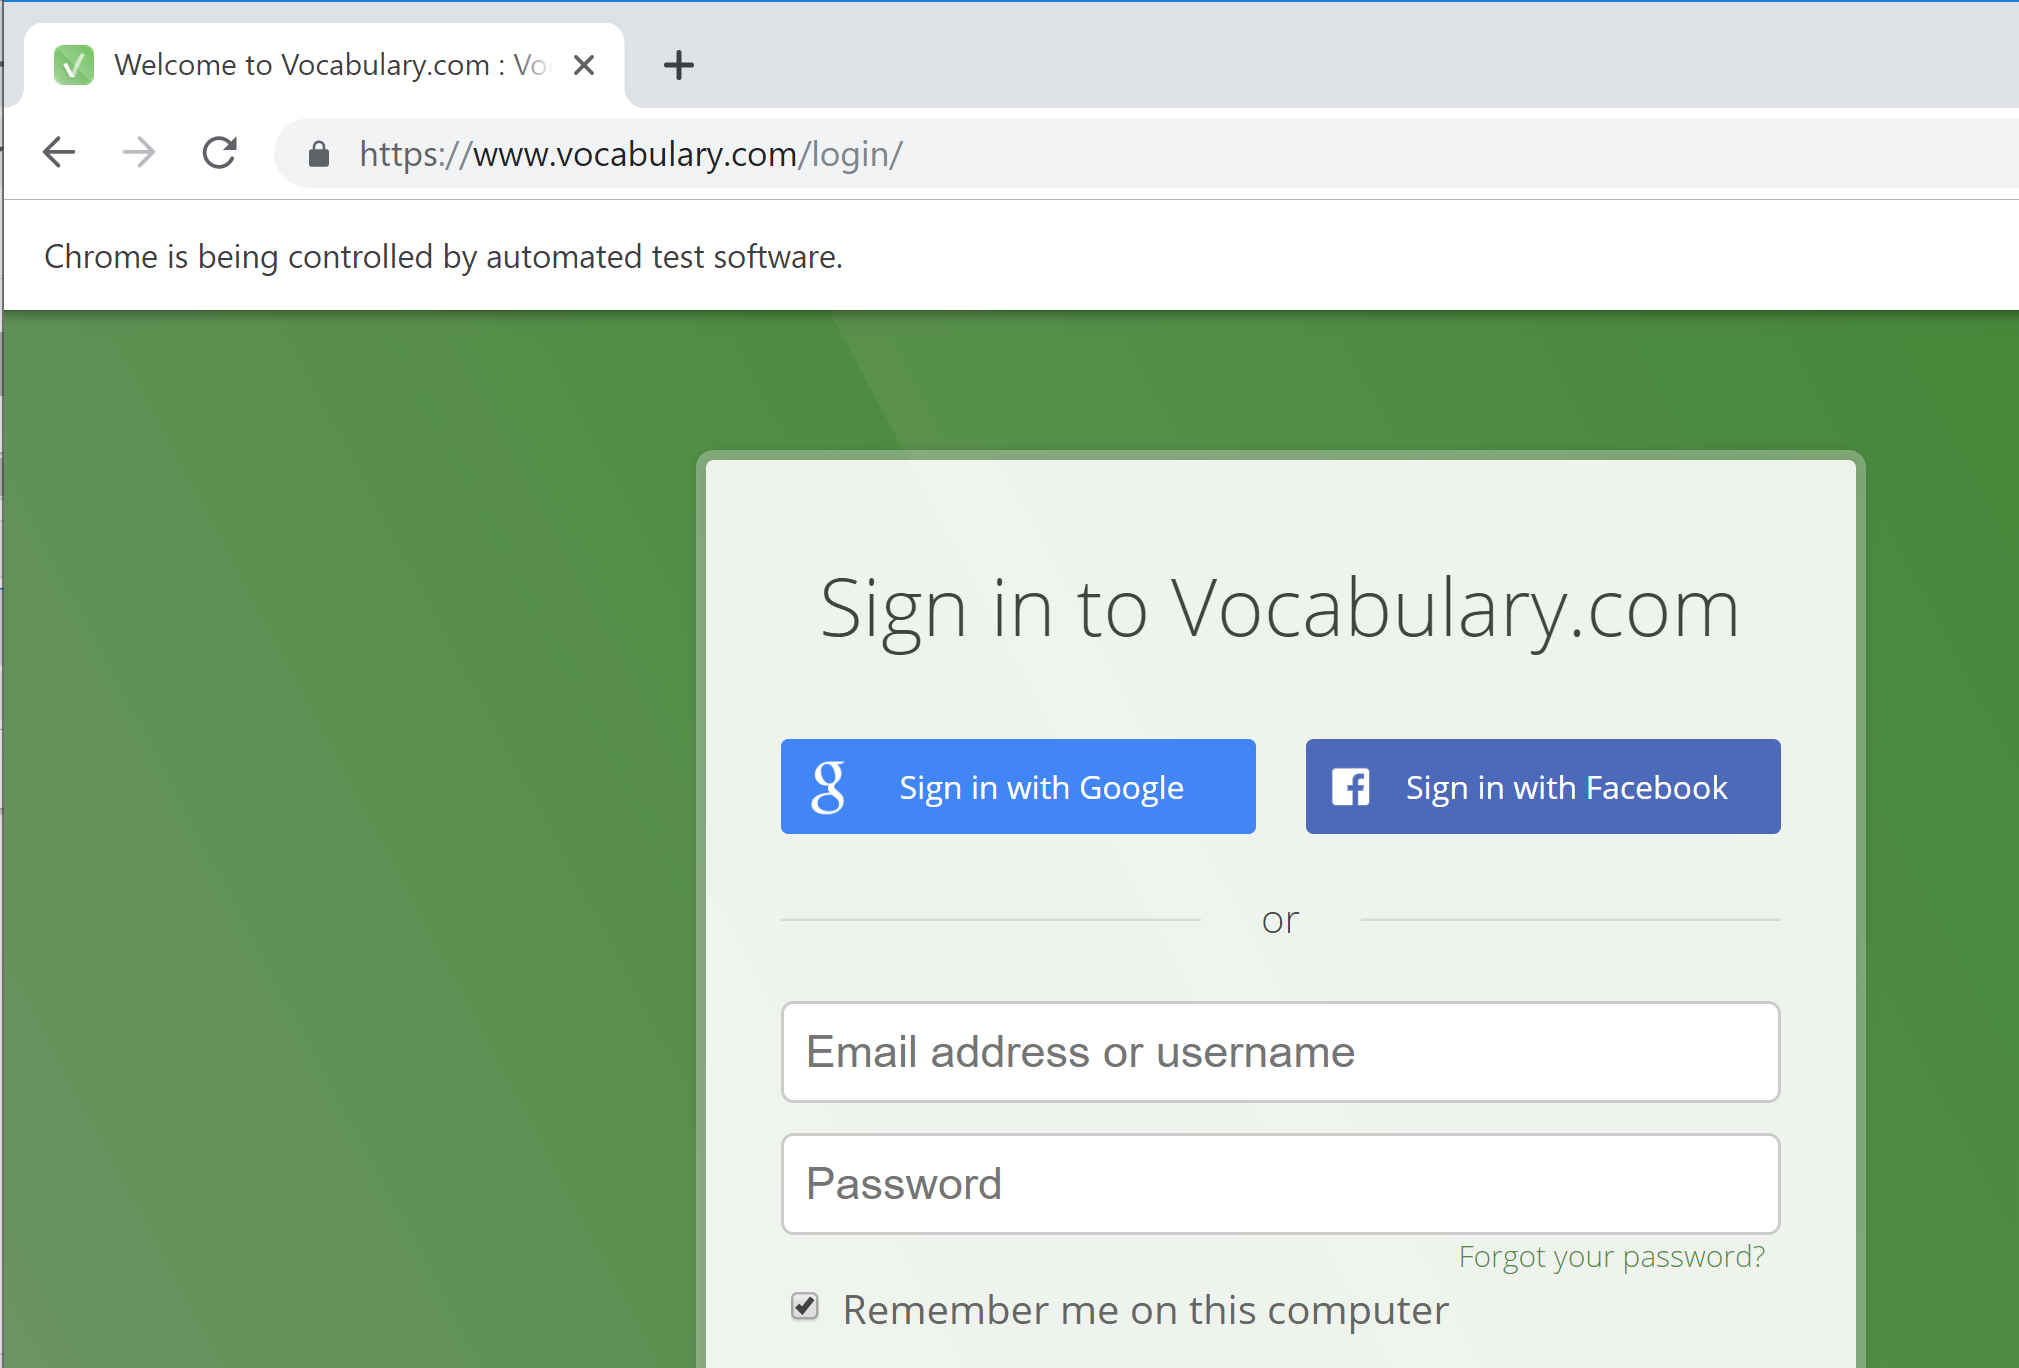

In [12]:
Image(filename="docs/_static/login_page.PNG", width = 1000)

&nbsp;

&nbsp;

&nbsp;

to log in run the following udf, watch closely as your credentials are populated: 

In [7]:
def login(url, v_username, v_password):
    driver.get(url)
    username = driver.find_element_by_name("username")
    password = driver.find_element_by_name("password")
    username.send_keys(v_username)
    password.send_keys(v_password)
    driver.find_element_by_class_name("green").click()

In [8]:
login(url=login_page, v_username=vcblry_usr, v_password=vcblry_pwd )

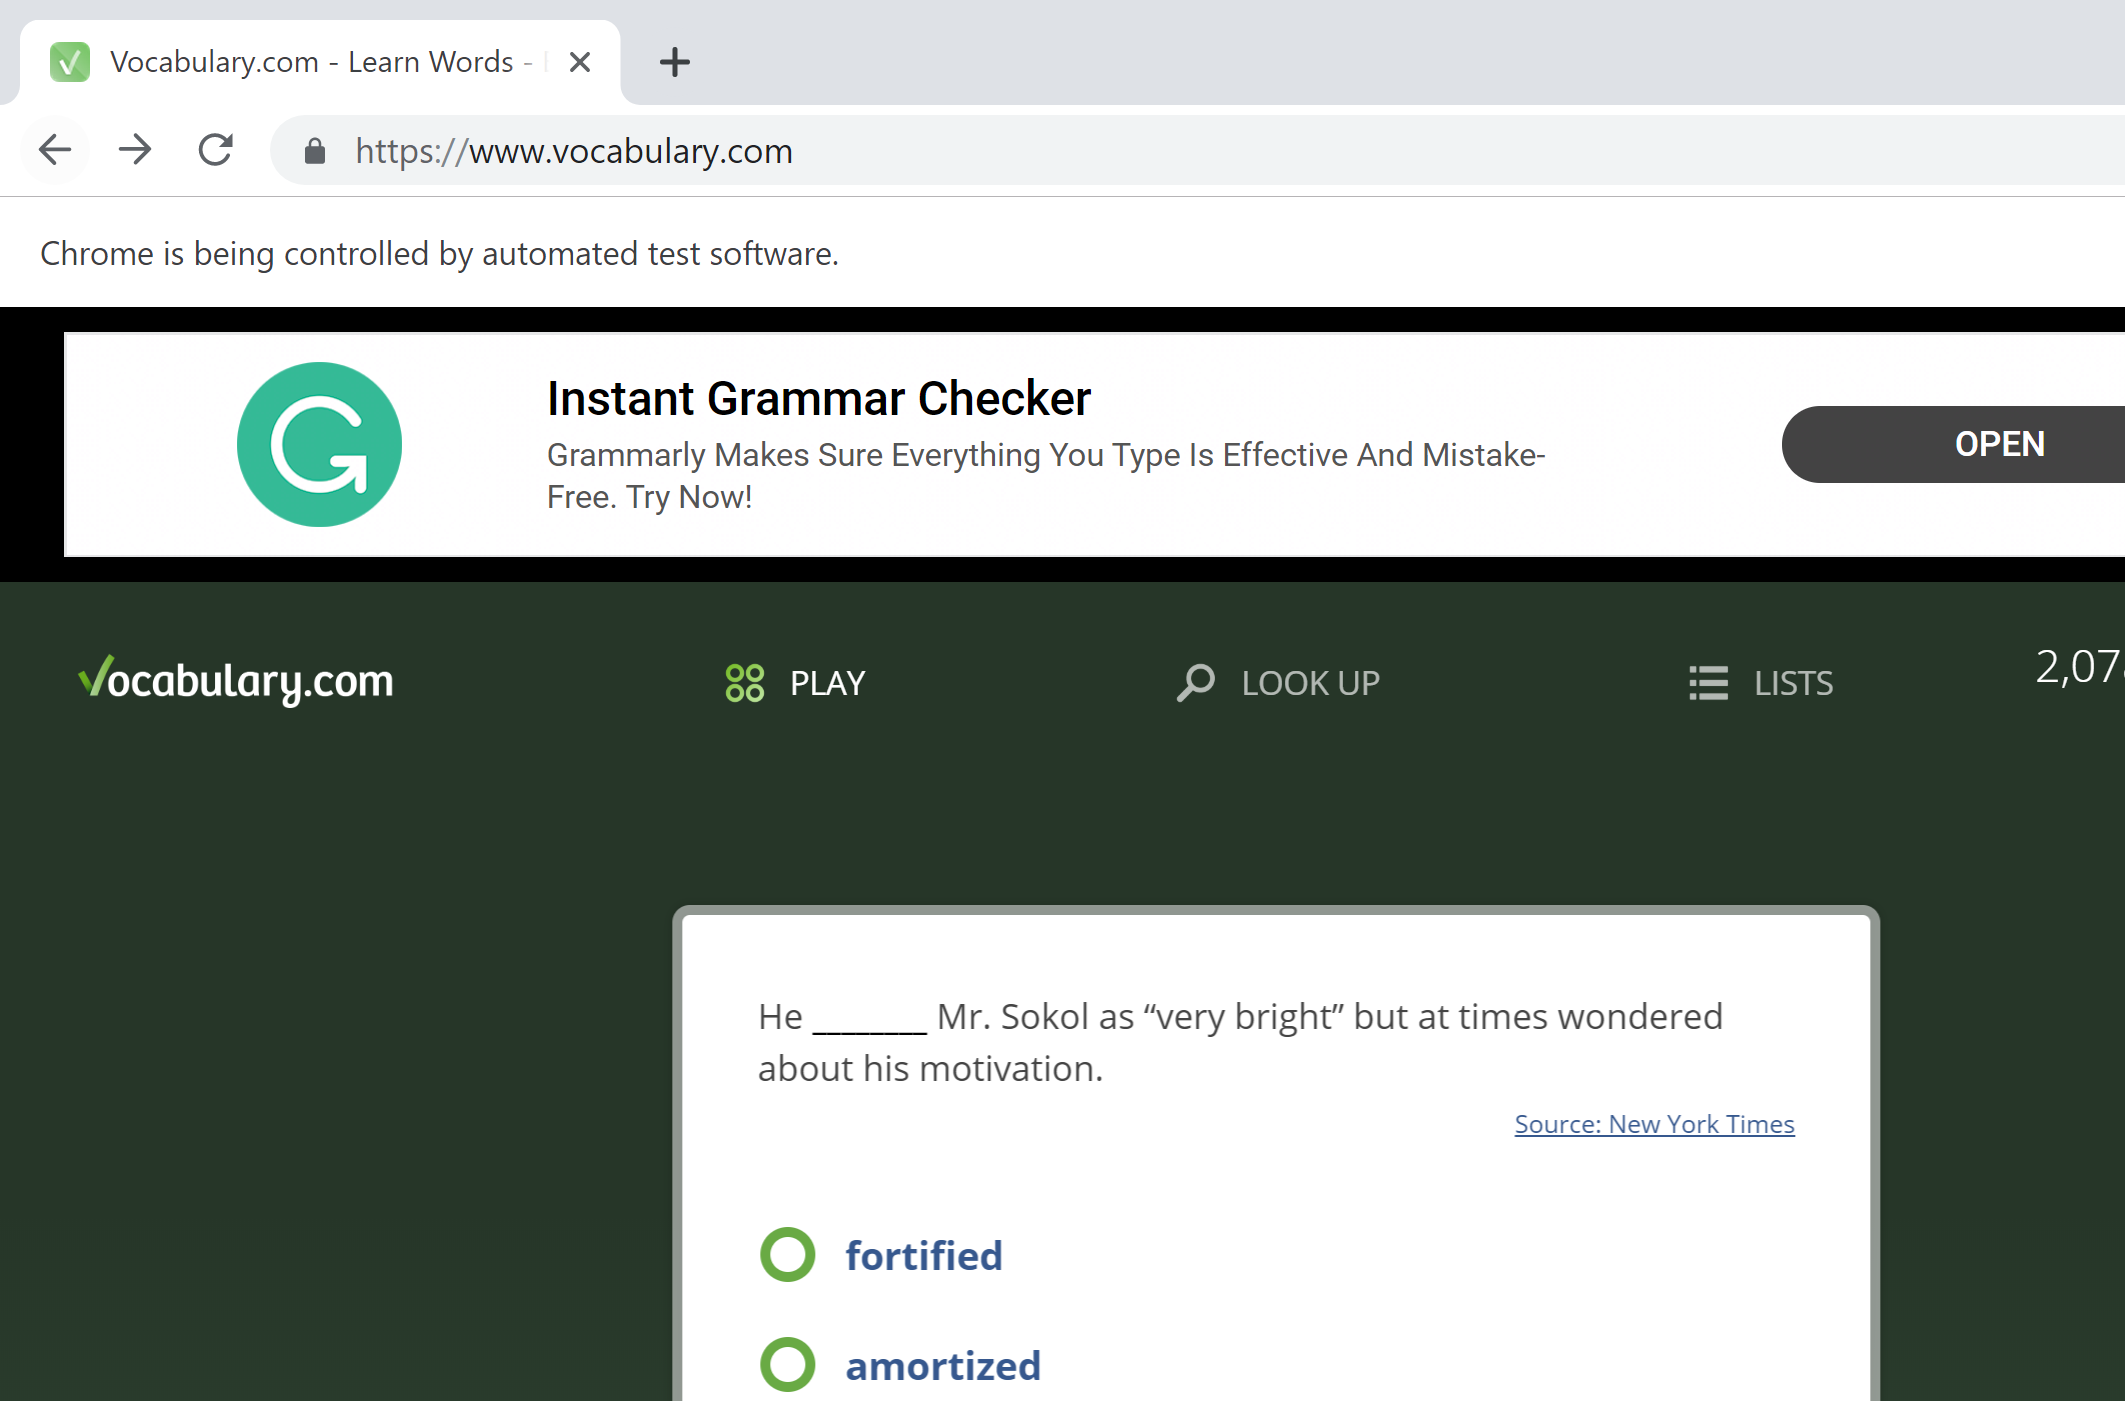

In [15]:
Image(filename="docs/_static/logged_in.PNG", width = 1000)

&nbsp;

&nbsp;

&nbsp;

at the point you should be in your account on the _play_ page


### 2.  to the _Words I've Mastered_ page (target_url)

In [9]:
driver.get(target_url)

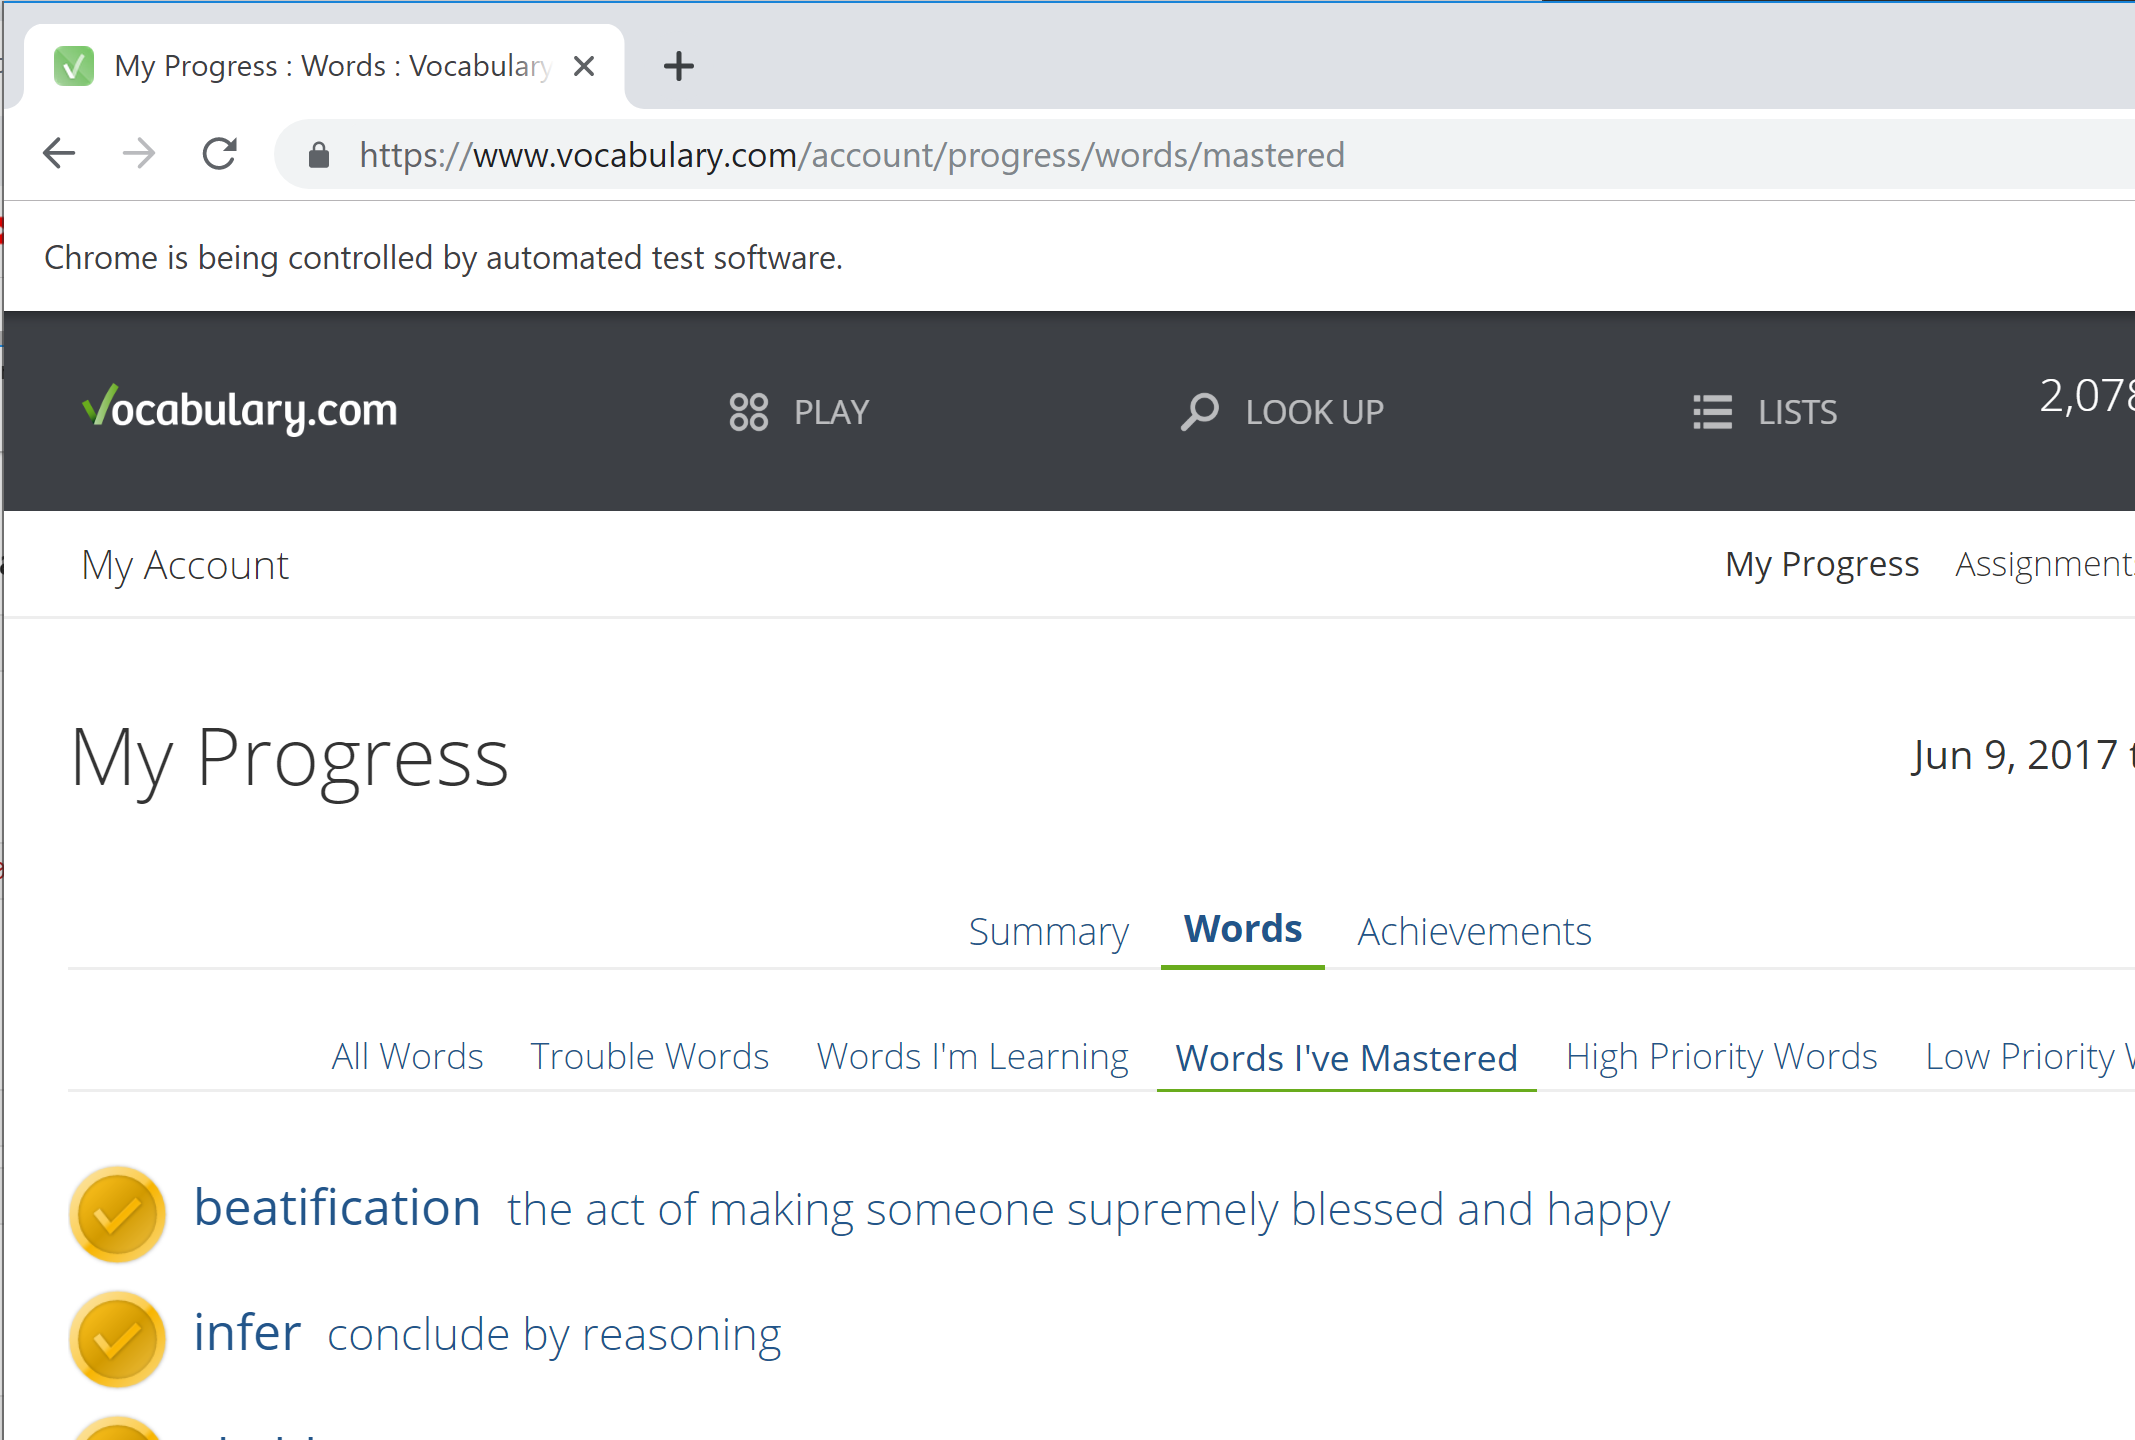

In [17]:
Image(filename="docs/_static/target_url.PNG", width = 1000)

&nbsp;

&nbsp;

&nbsp;

scroll all the way to the bottom of the page. If there's a second page it will be revealed when the scroll reaches the bottom of the page.  

notice that the URL in the addressbar will have a _page 2_ 

In [33]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

&nbsp;

### 3. get the page source

In [34]:
source = driver.page_source

In [35]:
print(source[:2000])

<html xmlns:vcom="" xmlns:fb="" class=" video objectfit object-fit no-videoautoplay"><head>	
	<title>My Progress : Words : Vocabulary.com</title>
	<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0">
    <meta name="description" content="Vocabulary.com - learn new words, play games that improve your vocabulary, and find easy-to-understand definitions in our super-fast dictionary.">
 	<meta name="robots" content="noarchive">
 	<meta name="googlebot" content="noodp, noarchive">
    
    <meta name="helpwidget" data-search="&quot;learning program&quot;">
	
 
	<link rel="search" type="application/opensearchdescription+xml" href="https://www.vocabulary.com/search.xml" title="Vocabulary.com">    
	<link href="//cdn.vocab.com/images/ios-icons/114x114-off5pn.png" rel="apple-touch-icon">
	<link href="//cdn.vocab.com/images/favicons/favicon-32x32-2frmtt.png" sizes="32x32" rel="icon" type="image/png">
	<link href="//cdn.vocab.com/images/favicons/favicon-16x16-

&nbsp;

parse the source using BeautifulSoup

In [36]:
soup = BeautifulSoup(source)

&nbsp;

the tag of intereset `ol` with the `class` <b>words</b> contains all the mastered words and their definitions

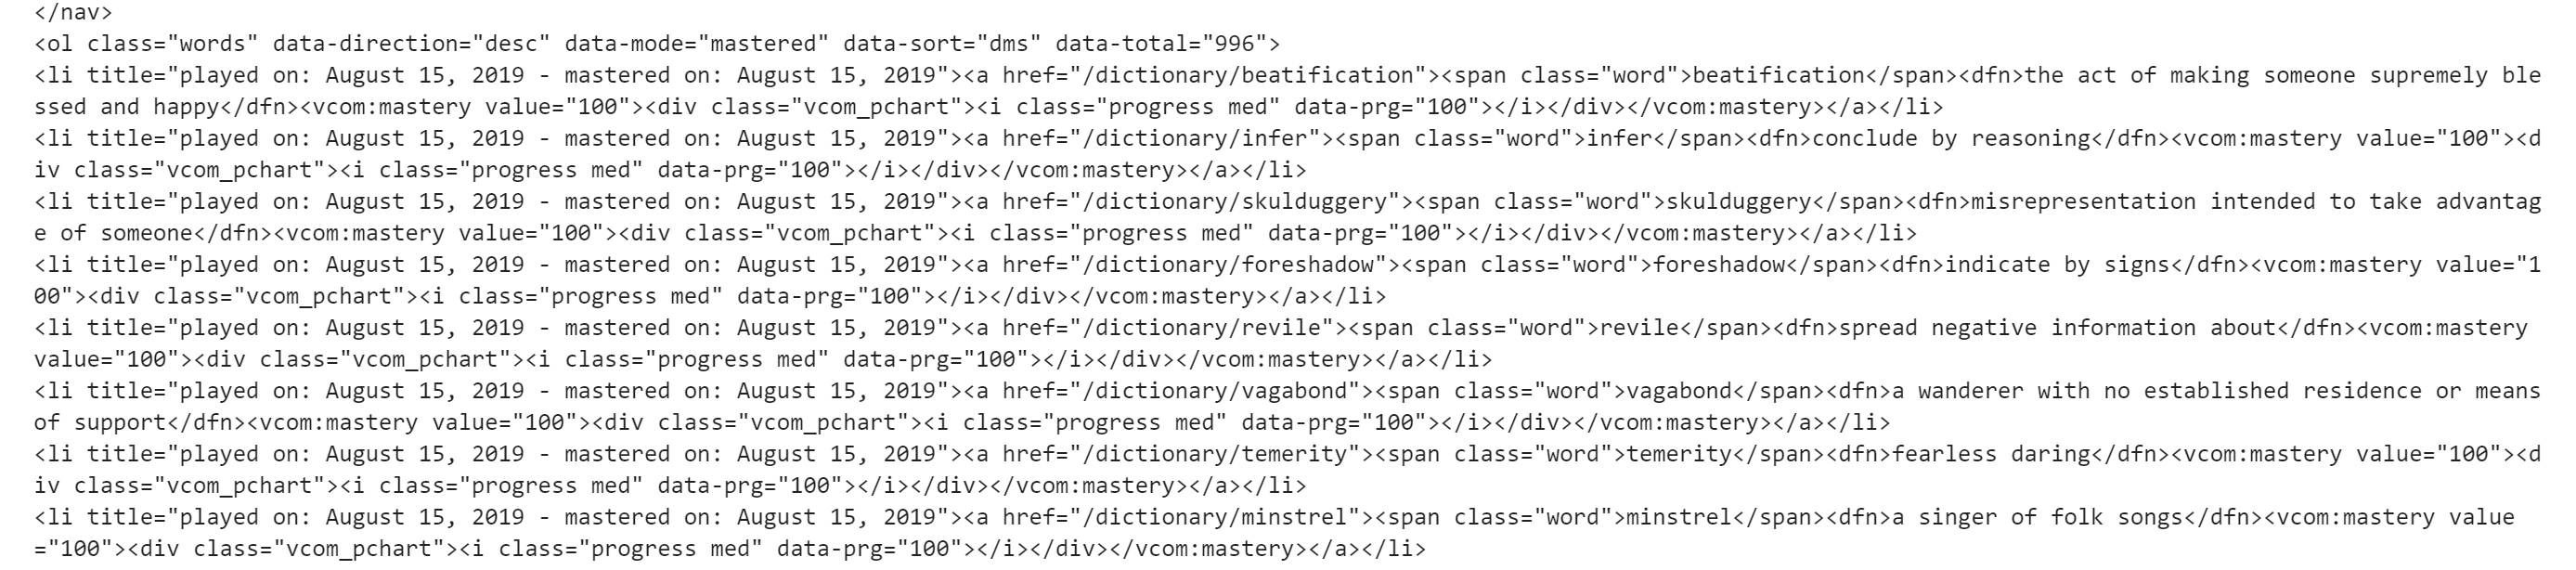

In [22]:
Image(filename="docs/_static/source_class.PNG")

&nbsp;

extract the `ol` object

In [37]:
the_words = soup.findAll("ol", {"class": "words"})

&nbsp;

extract the words and their definitions from `the_words` object   

using the instance method `findAll()` we can also search for a tag only: 

In [38]:
the_words[0].findAll("span")[:10]

[<span class="word">paladin</span>,
 <span class="word">fusillade</span>,
 <span class="word">temperance</span>,
 <span class="word">etiology</span>,
 <span class="word">huckster</span>,
 <span class="word">foolhardy</span>,
 <span class="word">teem</span>,
 <span class="word">avail</span>,
 <span class="word">meditate</span>,
 <span class="word">suppurate</span>]

In [39]:
the_words[0].findAll("dfn")[:10]

[<dfn>someone who fights for a cause</dfn>,
 <dfn>rapid simultaneous discharge of firearms</dfn>,
 <dfn>the trait of avoiding excesses</dfn>,
 <dfn>the cause of a disease</dfn>,
 <dfn>a seller of shoddy goods</dfn>,
 <dfn>marked by defiant disregard for danger or consequences</dfn>,
 <dfn>be full of or abuzz with</dfn>,
 <dfn>be of use to, be useful to</dfn>,
 <dfn>reflect deeply on a subject</dfn>,
 <dfn>cause to ripen and discharge pus</dfn>]

&nbsp;

extract the texts from all the tags and convert to lower case:

In [40]:
words = [i.get_text().lower() for i in the_words[0].findAll("span")]
dfns =  [i.get_text().lower() for i in the_words[0].findAll("dfn")]

&nbsp;

collect in a dataframe

In [41]:
words_df = pd.DataFrame(list(zip(words, dfns)), columns=["word", "definition"])

In [42]:
pd.set_option("display.max_colwidth", 700)

In [43]:
words_df = words_df.sort_values(by = ["word"]).reset_index(drop = True)

In [44]:
words_df.shape

(1060, 2)

In [45]:
words_df

,word,definition
0,abase,cause to feel shame
1,abdicate,"give up, such as power, as of monarchs and emperors"
2,aberration,a state or condition markedly different from the norm
3,abeyance,temporary cessation or suspension
4,abject,of the most contemptible kind
5,abjection,a low or downcast state
6,abjure,formally reject or disavow a formerly held belief
7,abolish,do away with
8,abrogate,revoke formally
9,absolve,grant remission of a sin to


&nbsp;

&nbsp;

close driver 

In [48]:
words_df.to_csv("data/words_df_092919.csv", index = False)

In [47]:
driver.close()

## Joyous Disquisitions